In [26]:
real_filenames = {"opt20" : './results/04-opt-evaluation-new2020-min-runtimes.json',
                 'opt14' : './results/03-opt-evaluation-new2014-min-runtimes.json', 
                 'sat14' : './results/06-sat-evaluation-new2014-min-runtimes.json', 
                 'sat20' : './results/07-sat-evaluation-new2020-min-runtimes.json'}

predicted_filenames = {"opt20" : './results/2020-09-03-opt20-predicted-min-runtimes.json',
                      'opt14' : './results/2020-09-03-opt14-predicted-min-runtimes.json',
                      'sat14' : './results/2020-09-03-sat14-predicted-min-runtimes.json', 
                      'sat20' : './results/2020-09-03-sat20-predicted-min-runtimes.json'}

# Exclude some domains where predicted runtimes are based on the baseline.
domains_excluded = {"opt20" : ['gripper'],
                      'opt14' : ['gripper'],
                      'sat14' : ['gripper', 'miconic-strips'], 
                      'sat20' : ['gripper', 'miconic-strips', 'elevators']}


In [69]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import math
import json

def prediction_plot(track):
    with open(real_filenames[track]) as f1:
          real_data = json.load(f1) 

    with open(predicted_filenames[track]) as f2:
          predicted_data = json.load(f2)

    real = []
    predicted = []
    categories = []
    categories_matter = defaultdict(int)
    
    for instance in sorted(real_data): 
        domain = instance.split(":")[0]
        if domain in domains_excluded[track]: 
            continue
        
        rtime = real_data[instance] if real_data[instance] else 2000
        ptime = predicted_data[instance.replace('.pddl', '')] if predicted_data[instance.replace('.pddl', '')] else 2000
        
        if abs(rtime-ptime) > 200 and max(rtime/ptime, ptime/rtime) > 10:
            categories_matter[domain] += 1
            
        real.append(rtime)
        predicted.append(ptime)
        categories.append(domain)
        
    categories = [c if categories_matter[c] > 2 else 'others' for c in categories ]
        
    df = pd.DataFrame(dict(x=real, y=predicted, label=categories))
    groups = df.groupby('label')

    f, ax = plt.subplots(figsize=(6, 6))

    ax.plot([0, 1], [0, 1], transform=ax.transAxes)

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='',  label=name)

    ax.legend(numpoints=1, loc='upper left', bbox_to_anchor=(1.05, 1), title=track)

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Real")
    plt.ylabel("Predicted")
    plt.grid()
    
    plt.plot([0.5, 2000], [180, 180], color='red')
    plt.plot([180, 180], [0.5, 2000], color='red')


    # Matplotlib Scatter Plot
    plt.show()




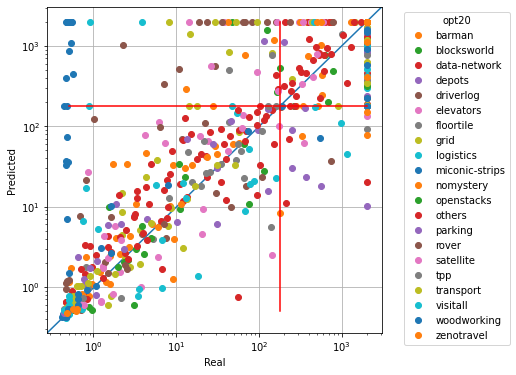

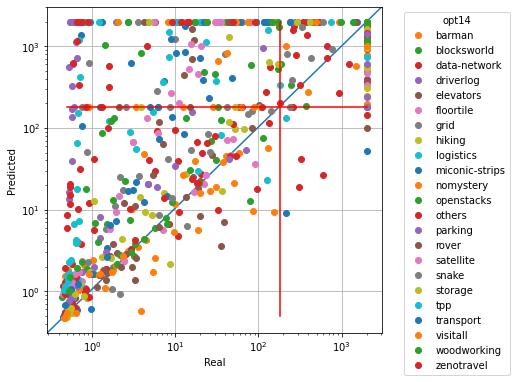

In [70]:
prediction_plot('opt20')
prediction_plot('opt14')

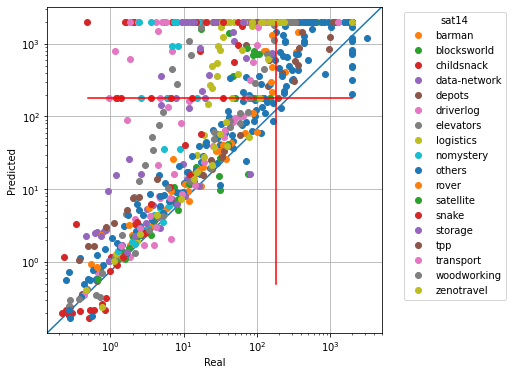

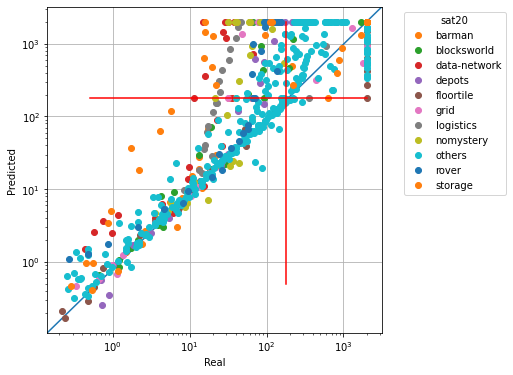

In [71]:
prediction_plot('sat14')
prediction_plot('sat20')